In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator ,  array_to_img, img_to_array, load_img

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import numpy as np  
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.regularizers import l2
from matplotlib.image import imread
import cv2
%matplotlib inline

In [3]:
X=[]
Z=[]
img_size=64
daisy_dir='flowers/daisy'
sunflower_dir='flowers/sunflower'
tulip_dir='flowers/tulip'
dandelion_dir='flowers/dandelion'
rose_dir='flowers/rose'

In [4]:
def process_train_data(flower_type,DIR):
    for img in os.listdir(DIR):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (img_size,img_size))
        X.append(np.array(img))
        Z.append(str(flower_type))

In [5]:
process_train_data('daisy',daisy_dir)

In [6]:
process_train_data('sunflower',sunflower_dir)

In [7]:
process_train_data('tulip',tulip_dir)

In [8]:
process_train_data('dandelion',dandelion_dir)


In [9]:
process_train_data('rose',rose_dir)

In [11]:
#labelling
enc = LabelEncoder()
Y = enc.fit_transform(Z)
Y = to_categorical(Y,5)
X = np.array(X)
X = X.astype('float32')
#normalizing
X = X/255.

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=13)

In [13]:
y_train.shape

(3458, 5)

In [14]:
x_test.shape

(865, 64, 64, 3)

In [19]:
def CNN():
    cnn1 = Sequential()
    cnn1.add(Conv2D(32,kernel_size=(5,5),padding='same', activation='relu',input_shape=(img_size,img_size,3)))
    cnn1.add(MaxPooling2D(pool_size=(2,2)))
    cnn1.add(Conv2D(64,kernel_size=(3,3),padding ='same' , activation='relu'))
    cnn1.add(MaxPooling2D(strides=(2,2),pool_size=(2,2)))
    cnn1.add(Dropout(0.35))
    cnn1.add(Conv2D(96,kernel_size=(3,3),padding='same',activation='relu'))
    cnn1.add(MaxPooling2D(strides=(2,2),pool_size=(2,2)))
    cnn1.add(Conv2D(96,kernel_size=(3,3),padding='same',activation='relu'))
    cnn1.add(MaxPooling2D(strides=(2,2),pool_size=(2,2)))
    cnn1.add(Dropout(0.35))
    cnn1.add(Flatten())
    cnn1.add(Dense(512,activation='relu'))
    cnn1.add(Dense(2*64,activation='relu'))
    cnn1.add(Dense(5,activation='softmax'))
    cnn1.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return cnn1

In [16]:
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [20]:
mode = CNN()
mode.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 96)        55392     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 96)          0         
__________

In [21]:
History = mode.fit(x=x_train,y=y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 3458 samples, validate on 865 samples
Epoch 1/20
3458/3458 [==============================] - 48s 14ms/step - loss: 1.4286 - acc: 0.3412 - val_loss: 1.2392 - val_acc: 0.4913
Epoch 2/20
3458/3458 [==============================] - 47s 14ms/step - loss: 1.1605 - acc: 0.4954 - val_loss: 1.2244 - val_acc: 0.5098
Epoch 3/20
3458/3458 [==============================] - 45s 13ms/step - loss: 1.0949 - acc: 0.5495 - val_loss: 1.0437 - val_acc: 0.5676
Epoch 4/20
3458/3458 [==============================] - 46s 13ms/step - loss: 1.0279 - acc: 0.5862 - val_loss: 0.9914 - val_acc: 0.5873
Epoch 5/20
3458/3458 [==============================] - 51s 15ms/step - loss: 0.9401 - acc: 0.6243 - val_loss: 1.0301 - val_acc: 0.5746
Epoch 6/20
3458/3458 [==============================] - 48s 14ms/step - loss: 0.9287 - acc: 0.6180 - val_loss: 0.9152 - val_acc: 0.6335
Epoch 7/20
3458/3458 [==============================] - 51s 15ms/step - loss: 0.8764 - ac

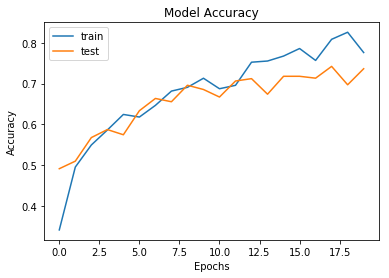

In [22]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [23]:
preds3 = mode.evaluate(x=x_test,y=y_test)
print()
print ("Loss = " + str(preds3[0]))
print ("Test Accuracy = " + str(preds3[1]))

865/865 [==============================] - 6s 7ms/step

Loss = 0.7185051986333951
Test Accuracy = 0.7364161849710983
